# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


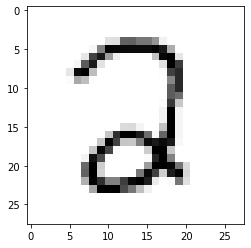

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2456858355835934
train accuracy is: 0.57102320146887, test accuracy is 0.5594758064516129


Epoch 10 Loss 0.10630291194323409
train accuracy is: 0.9152896010682691, test accuracy is 0.9248991935483871


Epoch 20 Loss 0.06034126417872089
train accuracy is: 0.9409113670505759, test accuracy is 0.9490927419354839


Epoch 30 Loss 0.04609908723450299
train accuracy is: 0.9504256384576866, test accuracy is 0.9576612903225806


Epoch 40 Loss 0.03940458730334355
train accuracy is: 0.9550993156401268, test accuracy is 0.9606854838709677


Epoch 50 Loss 0.035501207286454235
train accuracy is: 0.9591887831747622, test accuracy is 0.9637096774193549


Epoch 60 Loss 0.032924842436432046
train accuracy is: 0.9625271240193624, test accuracy is 0.9657258064516129


Epoch 70 Loss 0.031053868853893322
train accuracy is: 0.9644466700050075, test accuracy is 0.9667338709677419


Epoch 80 Loss 0.029610206075167855
train accuracy is: 0.9665331330328827, test accuracy is 0.9657258064516129


Epoch 90 Loss 0.028448377868473707
train accuracy is: 0.9682857619762978, test accuracy is 0.9657258064516129


Epoch 100 Loss 0.02748262636663866
train accuracy is: 0.9695376397930229, test accuracy is 0.9657258064516129


Epoch 110 Loss 0.026657244894070387
train accuracy is: 0.970372225004173, test accuracy is 0.9667338709677419


Epoch 120 Loss 0.025935046147780857
train accuracy is: 0.971206810215323, test accuracy is 0.9672379032258065


Epoch 130 Loss 0.02528751642722246
train accuracy is: 0.971290268736438, test accuracy is 0.9672379032258065


Epoch 140 Loss 0.024706829316867095
train accuracy is: 0.971540644299783, test accuracy is 0.9672379032258065


Epoch 150 Loss 0.02416944215739025
train accuracy is: 0.972041395426473, test accuracy is 0.9682459677419355


Epoch 160 Loss 0.02367323200198601
train accuracy is: 0.9727090635953931, test accuracy is 0.96875


Epoch 170 Loss 0.023205087828497978
train accuracy is: 0.9736271073276581, test accuracy is 0.969758064516129


Epoch 180 Loss 0.02276155994584271
train accuracy is: 0.9737940243698882, test accuracy is 0.9707661290322581


Epoch 190 Loss 0.02234921569024315
train accuracy is: 0.9741278584543482, test accuracy is 0.9712701612903226


Epoch 200 Loss 0.021943772180039223
train accuracy is: 0.9746286095810383, test accuracy is 0.9707661290322581


Epoch 210 Loss 0.021561379700812715
train accuracy is: 0.9748789851443832, test accuracy is 0.9712701612903226


Epoch 220 Loss 0.021197379519351012
train accuracy is: 0.9753797362710733, test accuracy is 0.9712701612903226


Epoch 230 Loss 0.020836759308736064
train accuracy is: 0.9757970288766483, test accuracy is 0.9707661290322581


Epoch 240 Loss 0.020485827208086168
train accuracy is: 0.9760474044399933, test accuracy is 0.9722782258064516


0.011840333998553424

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.2658743646385376
train accuracy is: 0.5861291937906861, test accuracy is 0.5665322580645161


Epoch 10 Loss 0.10606078817114764
train accuracy is: 0.9048572859288934, test accuracy is 0.9223790322580645


Epoch 20 Loss 0.08077011000419211
train accuracy is: 0.9229677850108496, test accuracy is 0.9390120967741935


Epoch 30 Loss 0.0694382190999829
train accuracy is: 0.9333166416291103, test accuracy is 0.9465725806451613


Epoch 40 Loss 0.06265790276767821
train accuracy is: 0.9379903188115507, test accuracy is 0.952116935483871


Epoch 50 Loss 0.058034155592920626
train accuracy is: 0.9418294107828409, test accuracy is 0.9566532258064516


Epoch 60 Loss 0.054631665632226344
train accuracy is: 0.9442497078951761, test accuracy is 0.9591733870967742


Epoch 70 Loss 0.051997922416252514
train accuracy is: 0.9471707561342013, test accuracy is 0.9621975806451613


Epoch 80 Loss 0.04988230099756118
train accuracy is: 0.9487564680353864, test accuracy is 0.9621975806451613


Epoch 90 Loss 0.0481356707562138
train accuracy is: 0.9499248873309964, test accuracy is 0.9642137096774194


Epoch 100 Loss 0.046664747447040314
train accuracy is: 0.9510933066266066, test accuracy is 0.9642137096774194


Epoch 110 Loss 0.04540121465777941
train accuracy is: 0.9526790185277917, test accuracy is 0.9647177419354839


Epoch 120 Loss 0.044302503618400345
train accuracy is: 0.9535136037389418, test accuracy is 0.9647177419354839


Epoch 130 Loss 0.043333980156302056
train accuracy is: 0.9544316474712068, test accuracy is 0.9652217741935484


Epoch 140 Loss 0.0424734001916712
train accuracy is: 0.9552662326823569, test accuracy is 0.9657258064516129


Epoch 150 Loss 0.04170099333971524
train accuracy is: 0.956100817893507, test accuracy is 0.9667338709677419


Epoch 160 Loss 0.0410032803422787
train accuracy is: 0.956851944583542, test accuracy is 0.9667338709677419


Epoch 170 Loss 0.04036889057535145
train accuracy is: 0.957102320146887, test accuracy is 0.9672379032258065


Epoch 180 Loss 0.03978775027752738
train accuracy is: 0.957603071273577, test accuracy is 0.9667338709677419


Epoch 190 Loss 0.039253461245079786
train accuracy is: 0.9581872809213821, test accuracy is 0.9667338709677419


Epoch 200 Loss 0.038759902372365686
train accuracy is: 0.9588549490903021, test accuracy is 0.9672379032258065


Epoch 210 Loss 0.03830253066052574
train accuracy is: 0.9591053246536472, test accuracy is 0.9672379032258065


Epoch 220 Loss 0.03787660413043602
train accuracy is: 0.9593557002169921, test accuracy is 0.9672379032258065


Epoch 230 Loss 0.037477986573833916
train accuracy is: 0.9597729928225672, test accuracy is 0.9682459677419355


Epoch 240 Loss 0.037106260860407275
train accuracy is: 0.9597729928225672, test accuracy is 0.9682459677419355


0.043270311584233556

### Comparing results of NN and LR

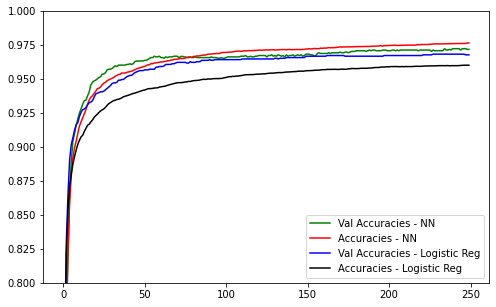

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

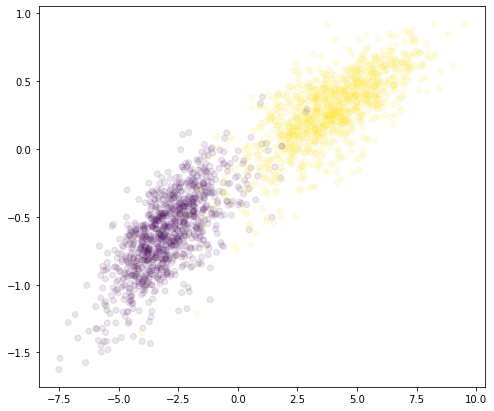

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

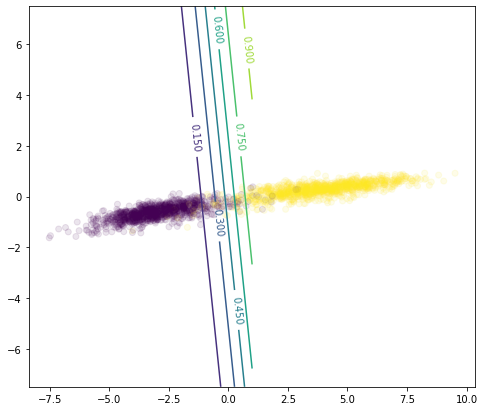

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );